In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

df=pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE' ,parse_dates=True)
df=df.dropna()
df.head()
df

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [5]:
print('Shape of data',df.shape)

Shape of data (1821, 5)


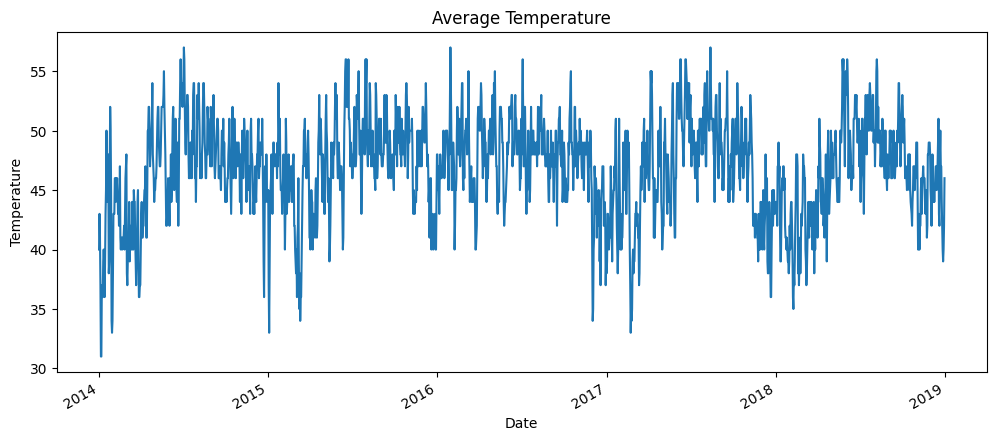

In [6]:
df['AvgTemp'].plot(figsize=(12, 5))
plt.title('Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [7]:
# Preprocess the data
data = df['AvgTemp'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [8]:
sequence_length = 30

In [9]:
# Prepare data for training
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length, 0])
    y.append(data_scaled[i+sequence_length, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  #(number of samples, sequence length=30, number of features=1)

In [10]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X.shape[1], 1), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1361 (5.32 KB)
Trainable params: 1361 (5.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50

56/56 [==============================] - 3s 6ms/step - loss: 0.2870
Epoch 2/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0109
Epoch 3/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0107
Epoch 4/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0103
Epoch 5/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0102
Epoch 6/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0098
Epoch 7/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0095
Epoch 8/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 9/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 10/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 11/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 12/50
56/56 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 13/50
56/56 [=============================

In [12]:
predictions_scaled = model.predict(X)
predictions = scaler.inverse_transform(predictions_scaled).flatten()

56/56 [==============================] - 0s 3ms/step


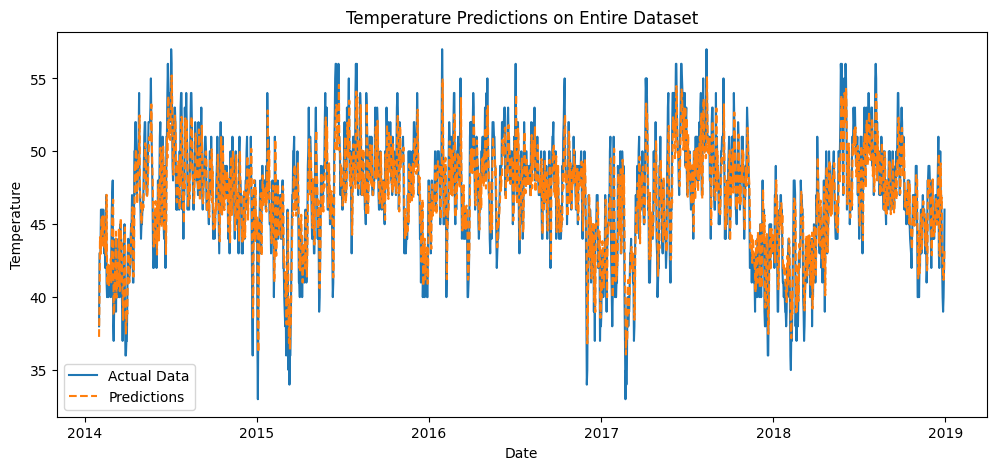

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(df.index[sequence_length:], df['AvgTemp'][sequence_length:], label='Actual Data')
plt.plot(df.index[sequence_length:], predictions, label='Predictions', linestyle='dashed')
plt.title('Temperature Predictions on Entire Dataset')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

actual_temps = df['AvgTemp'][sequence_length:].values
predicted_temps = predictions 

mse = mean_squared_error(actual_temps, predicted_temps)
rmse = sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 2.309602177728974


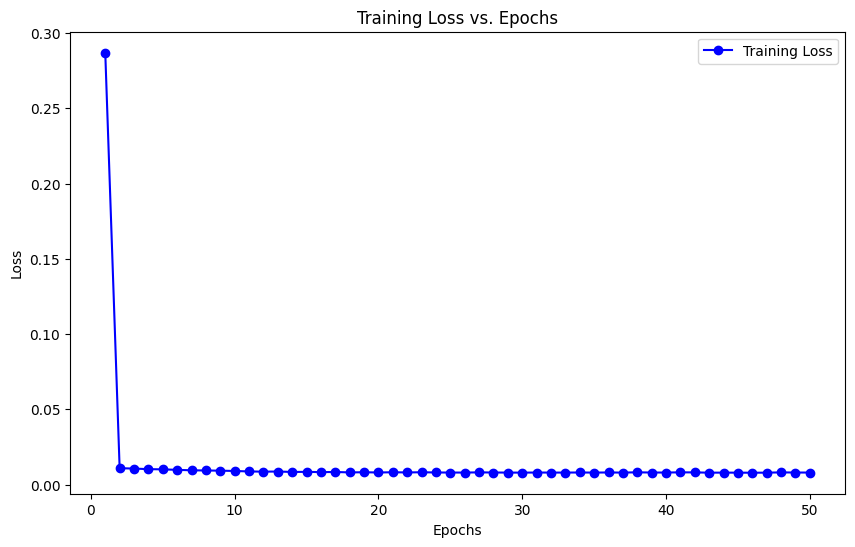

In [16]:
loss = history.history['loss']

# Extract the number of epochs
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
r_squared = r2_score(actual_temps, predicted_temps) #coefficient of determination
print(f"R-squared: {r_squared}")

R-squared: 0.6718461423816113
